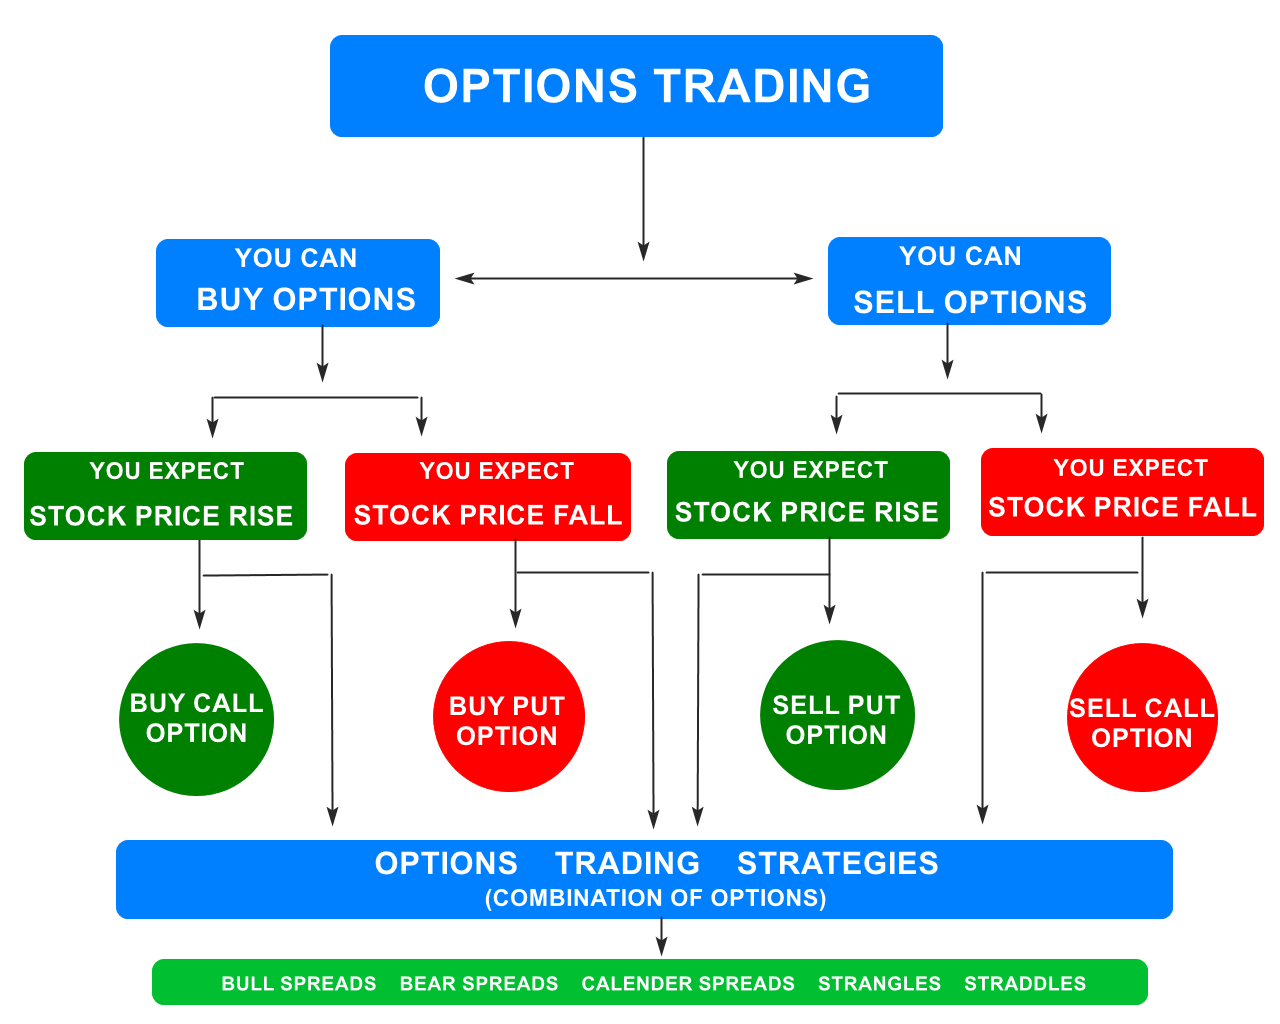

### What are Options?
Here you make a bet on the future price movement of a stock, index. 
- Unlike buying and selling stocks, where you directly own a share of a company, 
  options give you the right to buy or sell an asset at a predetermined price (known as the strike price) before a specific expiration date. 

### 2 types of options: calls and puts.

##### Call Option: 
- This gives you the right to buy the underlying asset at the strike price before the expiration date. 
- You might buy a call option if you believe the price of the asset will go up.

##### Put Option: 
- This gives you the right to sell the underlying asset at the strike price before the expiration date. 
- You might buy a put option if you believe the price of the asset will go down.

### How to make profit and loss in option?
When you buy an option, you pay a premium (the price of the option). If the option expires and the asset price hasn't moved in the direction you anticipated, you lose the premium you paid. However, if the asset price moves in the direction you predicted, you can make a profit.

In [1]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "AAPL"  # Example: Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Get the options chain
options_chain = ticker.option_chain

# Print the available call options
print("Call Options:")
print(options_chain.calls)

# Print the available put options
print("\nPut Options:")
print(options_chain.puts)


ModuleNotFoundError: No module named 'yfinance'

### long call Strategy

- You buy a call option.
- You have the right to buy the underlying asset at the strike price.
- Your profit is unlimited if the price of the underlying asset goes up significantly.

URL: https://www.youtube.com/watch?v=wNYRctW6X54

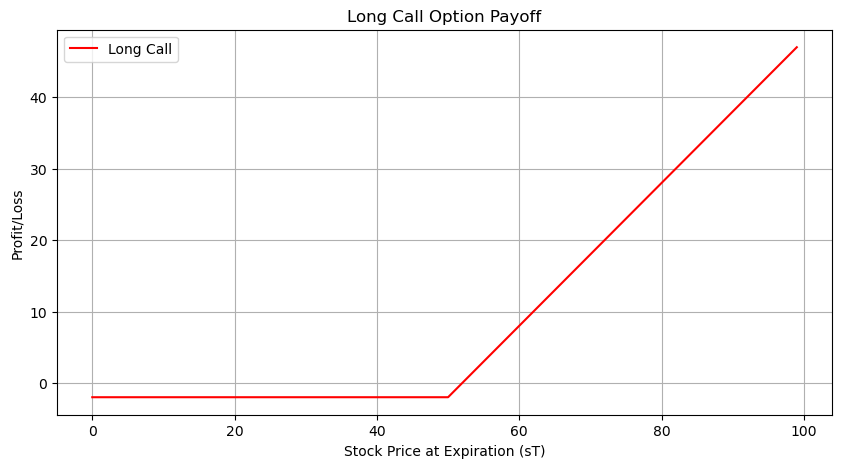

In [3]:
import numpy as np
import matplotlib.pyplot as plt

'''
This code defines a function long_call_payoff that calculates the payoff of a long call option strategy for a given range of possible prices,
of the underlying asset at expiration (sT). Then, it plots the payoff graphically using matplotlib.
You can play around with different values of strike_price and premium to see how they affect the payoff of the long call option strategy. 
'''

def long_call_payoff(sT, strike_price, premium):
    """
    Calculates the payoff of a long call option strategy.

    Parameters:
    sT (numpy.ndarray): Vector of possible values of the underlying asset price at expiration.
    strike_price (float): The strike price of the call option.
    premium (float): The price paid to buy the call option.

    Returns:
    numpy.ndarray: The payoff of the long call option strategy.
    """
    return np.where(sT > strike_price, sT - strike_price - premium, -premium)

# Define parameters
strike_price = 50  # Strike price of the call option
premium = 2        # Premium paid for buying the call option

# Define the range of possible prices at expiration
sT = np.arange(0, 100, 1)

# Calculate the payoff of the long call option strategy
payoff_long_call = long_call_payoff(sT, strike_price, premium)

# Plot the payoff
plt.figure(figsize=(10,5))
plt.title('Long Call Option Payoff')
plt.xlabel('Stock Price at Expiration (sT)')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.plot(sT, payoff_long_call, color='r', label='Long Call')
plt.legend()
plt.show()


### Straddle Strategy
payoff of a long put option and how to combine multiple options to create more complex strategies,
like a straddle.

#### Long Put Option Payoff:
- A long put option gives you the right to sell the underlying asset at the strike price. 
- The payoff of a long put option is calculated similarly to a long call option, but the payoff is positive when the asset price is below the strike price.

URL: https://www.youtube.com/watch?v=MH5lG41zJHw

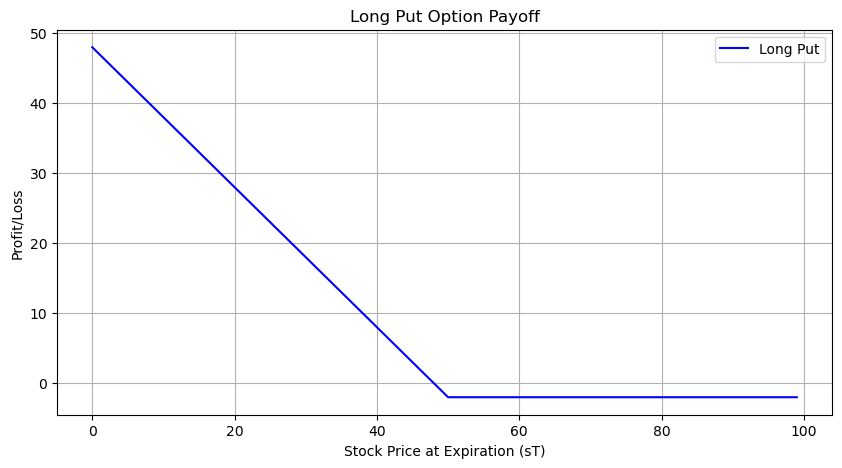

In [4]:
def long_put_payoff(sT, strike_price, premium):
    """
    Calculates the payoff of a long put option strategy.

    Parameters:
    sT (numpy.ndarray): Vector of possible values of the underlying asset price at expiration.
    strike_price (float): The strike price of the put option.
    premium (float): The price paid to buy the put option.

    Returns:
    numpy.ndarray: The payoff of the long put option strategy.
    """
    return np.where(sT < strike_price, strike_price - sT - premium, -premium)

# Define parameters
strike_price_put = 50  # Strike price of the put option
premium_put = 2        # Premium paid for buying the put option

# Calculate the payoff of the long put option strategy
payoff_long_put = long_put_payoff(sT, strike_price_put, premium_put)

# Plot the payoff
plt.figure(figsize=(10,5))
plt.title('Long Put Option Payoff')
plt.xlabel('Stock Price at Expiration (sT)')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.plot(sT, payoff_long_put, color='b', label='Long Put')
plt.legend()
plt.show()


### Combining Options: Straddle Strategy:
A straddle strategy involves buying both a call option and a put option with the same strike price and expiration date. It profits from significant price movements in either direction.

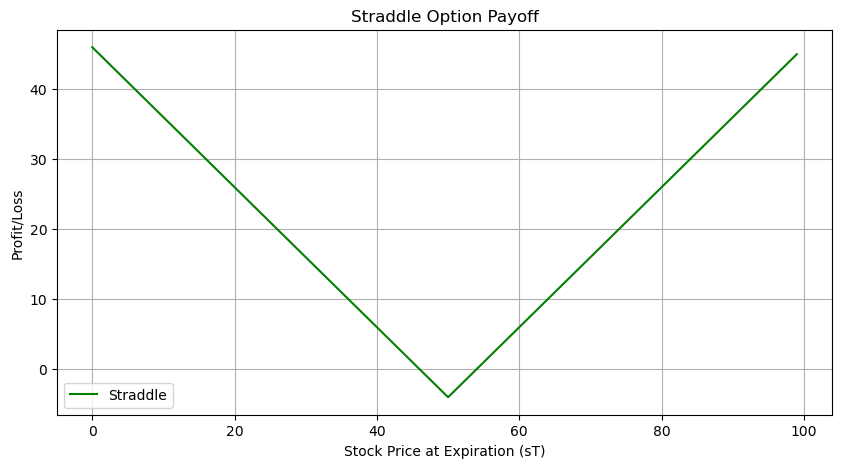

In [5]:
def straddle_payoff(sT, strike_price_straddle, premium_call, premium_put):
    """
    Calculates the payoff of a straddle option strategy.

    Parameters:
    sT (numpy.ndarray): Vector of possible values of the underlying asset price at expiration.
    strike_price_straddle (float): The strike price of both the call and put options.
    premium_call (float): The premium paid to buy the call option.
    premium_put (float): The premium paid to buy the put option.

    Returns:
    numpy.ndarray: The payoff of the straddle option strategy.
    """
    call_payoff = long_call_payoff(sT, strike_price_straddle, premium_call)
    put_payoff = long_put_payoff(sT, strike_price_straddle, premium_put)
    return call_payoff + put_payoff

# Define parameters for straddle
strike_price_straddle = 50  # Strike price of both call and put options
premium_call_straddle = 2   # Premium paid for buying the call option
premium_put_straddle = 2    # Premium paid for buying the put option

# Calculate the payoff of the straddle option strategy
payoff_straddle = straddle_payoff(sT, strike_price_straddle, premium_call_straddle, premium_put_straddle)

# Plot the payoff
plt.figure(figsize=(10,5))
plt.title('Straddle Option Payoff')
plt.xlabel('Stock Price at Expiration (sT)')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.plot(sT, payoff_straddle, color='g', label='Straddle')
plt.legend()
plt.show()


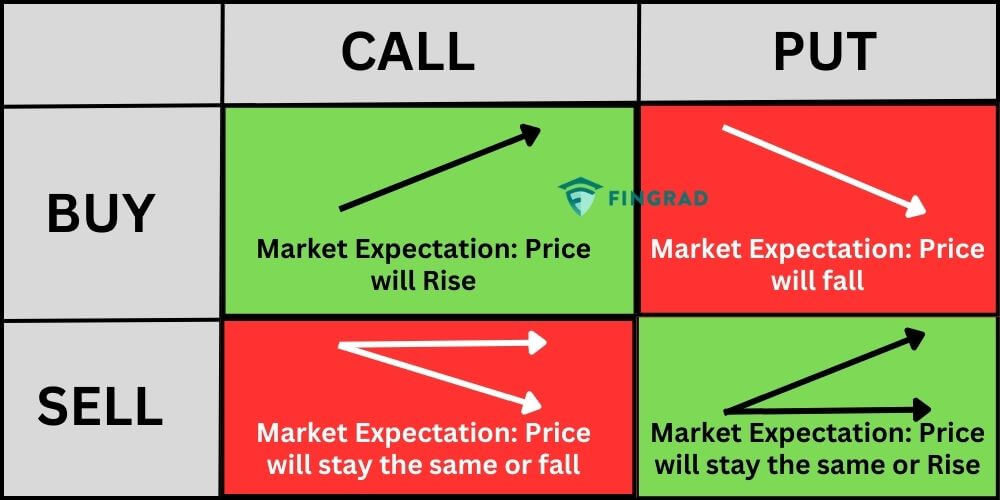